In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_covid = pd.read_csv("C:\PujaFiles\Excel data for practice\Covid\covid_india.csv")
df_covid.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2


In [9]:
df_covid.nsmallest(5,'Confirmed')

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
981,982,15-04-2020,5:00 PM,Nagaland,-,-,0,0,0
1014,1015,16-04-2020,5:00 PM,Nagaland,-,-,0,0,0
1047,1048,17-04-2020,5:00 PM,Nagaland,-,-,0,0,0
1080,1081,18-04-2020,5:00 PM,Nagaland,-,-,0,0,0
1113,1114,19-04-2020,5:00 PM,Nagaland,-,-,0,0,0


Changing the format of Date columns

In [11]:
import warnings as wng
wng.filterwarnings('ignore')
 
df_covid['Date'] = pd.to_datetime(df_covid['Date'])
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [12]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


Drop unwanted columns

In [13]:
df_covid.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [14]:
df_covid.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-01-02,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-03-02,Kerala,0,0,3


Calculate Active cases 

In [15]:
df_covid['ActiveCases']=df_covid['Confirmed'] -(df_covid['Cured'] + df_covid['Deaths'])
df_covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
18105,2021-11-08,Telangana,638410,3831,650353,8112
18106,2021-11-08,Tripura,77811,773,80660,2076
18107,2021-11-08,Uttarakhand,334650,7368,342462,444
18108,2021-11-08,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-11-08,West Bengal,1506532,18252,1534999,10215


# Pivot() and pivot_table():
The "pivot" function requires three arguments: index, columns, and values. \
The "pivot_table" function is more flexible and allows you to specify additional arguments such as sort, aggregation function, fill value,dropna , margins etc. Both functions return a DataFrame with hierarchical indexes on the index and columns2.

A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet etc.\
syntax: \
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)                                                                                         

# Groupby():
Pandas groupby is used for grouping the data according to the categories and applying a function to the categories. It makes the task of splitting the Dataframe over some criteria really easy and efficient.\
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, 
                  sort=True, group_keys=True, squeeze=NoDefault.no_default, 
                  observed=False, dropna=True)

In [17]:
statewise = pd.pivot_table(df_covid, values=['Confirmed','Deaths','Cured'],index=['State/UnionTerritory'],aggfunc=max)
#a=df_covid.groupby('State/UnionTerritory') [['Confirmed','Deaths','Cured']].max()
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544
Dadra and Nagar Haveli,10377,10261,4


Calculate RecoveryRate 

In [18]:
statewise['Rocovery_rate']=( statewise['Cured'] *100 ) / statewise['Confirmed']

Calculate MortalityRate

In [19]:
statewise['Mortality_rate']=(statewise['Deaths']*100) / statewise['Confirmed']
statewise.head()

,Confirmed,Cured,Deaths,Rocovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971


In [20]:
statewise = statewise.sort_values(by='Confirmed',ascending=False) #Sort by confirmed cases
statewise.head()

,Confirmed,Cured,Deaths,Rocovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262


In [35]:
statewise.style.background_gradient(cmap='Reds')
#Cmap=color map, present in matplotlib library. cmap=Reds,Blues,Greens,Oranges etc
#color code according to the frequencies of values .

,Confirmed,Cured,Deaths,Rocovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


# Display  Active Cases of top 10 States


In [19]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-01-02,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-03-02,Kerala,0,0,3,3


In [37]:
a=pd.pivot_table(df_covid,values=['ActiveCases'],index=['State/UnionTerritory'],aggfunc=max)
a.nlargest(9,'ActiveCases')

,ActiveCases
State/UnionTerritory,
Maharashtra,701614
Karnataka,605515
Kerala,445692
Tamil Nadu,313048
Uttar Pradesh,310783
Rajasthan,212753
Andhra Pradesh,211554
Gujarat,148297
West Bengal,132181


In [34]:
top10_ActiveCases=df_covid.groupby('State/UnionTerritory').max() [['ActiveCases']].nlargest(10,'ActiveCases')
top10_ActiveCases

,ActiveCases
State/UnionTerritory,
Maharashtra,701614
Karnataka,605515
Kerala,445692
Tamil Nadu,313048
Uttar Pradesh,310783
Rajasthan,212753
Andhra Pradesh,211554
Gujarat,148297
West Bengal,132181


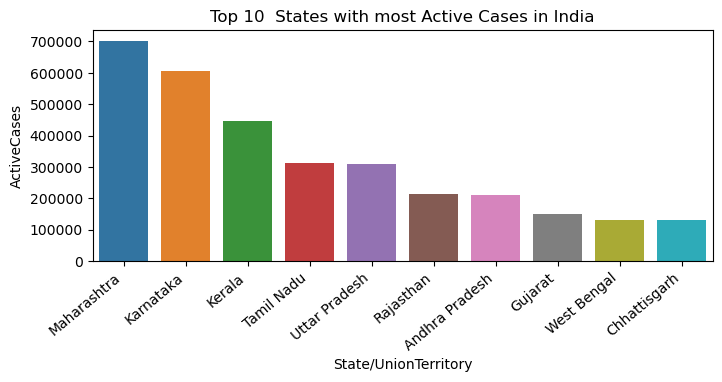

In [36]:
plt.figure(figsize=(8,3))
ax=sns.barplot(x=top10_ActiveCases.index , y='ActiveCases',data=top10_ActiveCases)
plt.title("Top 10  States with most Active Cases in India")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)
plt.show()

# Top 10 States with highest Death

In [22]:
top10_Death= df_covid.groupby('State/UnionTerritory').max() [['Deaths']].nlargest(10,'Deaths')
top10_Death

,Deaths
State/UnionTerritory,
Maharashtra,134201
Karnataka,36848
Tamil Nadu,34367
Delhi,25068
Uttar Pradesh,22775
West Bengal,18252
Kerala,18004
Punjab,16322
Andhra Pradesh,13564


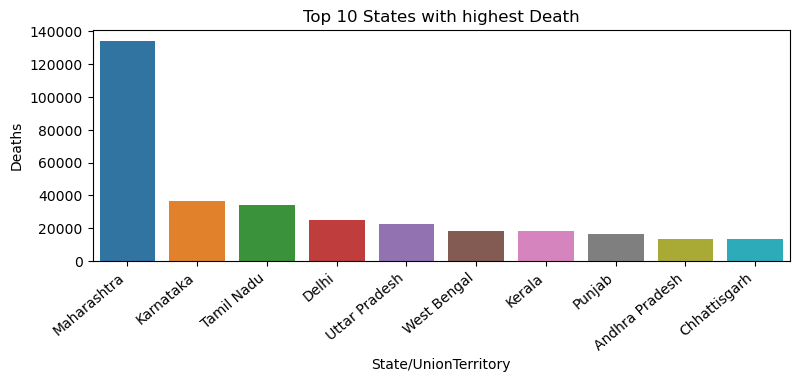

In [32]:
plt.figure(figsize=(9,3))
ax = sns.barplot(x=top10_Death.index, y='Deaths',data=top10_Death)
plt.title("Top 10 States with highest Death")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)
plt.show()

# Top 5 Most Affected States

In [37]:
top5 = df_covid.groupby('State/UnionTerritory').max() [['Confirmed']].nlargest(5,'Confirmed')
top5

,Confirmed
State/UnionTerritory,
Maharashtra,6363442
Kerala,3586693
Karnataka,2921049
Tamil Nadu,2579130
Andhra Pradesh,1985182


In [45]:
df = df_covid[ df_covid['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Andhra Pradesh']) ]
df.tail(8).sort_values(by='Confirmed',ascending=False)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
18094,2021-11-08,Maharashtra,6159676,134201,6363442,69565
18058,2021-10-08,Maharashtra,6151956,134064,6357833,71813
18090,2021-11-08,Kerala,3396184,18004,3586693,172505
18054,2021-10-08,Kerala,3377691,17852,3565574,170031
18089,2021-11-08,Karnataka,2861499,36848,2921049,22702
18104,2021-11-08,Tamil Nadu,2524400,34367,2579130,20363
18068,2021-10-08,Tamil Nadu,2522470,34340,2577237,20427
18075,2021-11-08,Andhra Pradesh,1952736,13564,1985182,18882


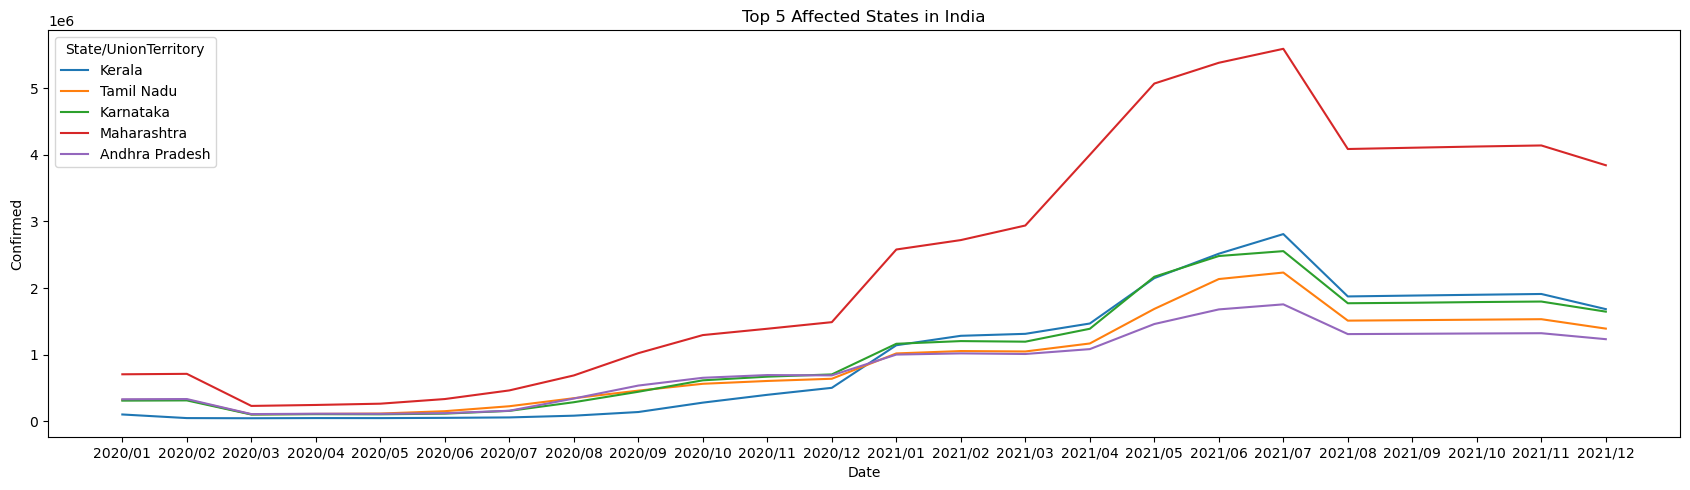

In [35]:
# Strftime() function is used to convert date and time objects to their string representation.
# hue parameter determines which column in the data frame should be used for colour encoding.
plt.figure(figsize=(17,5))
sns.lineplot(data=df, x =(df['Date']).dt.strftime('%Y/%m') 
             , y='Confirmed', hue='State/UnionTerritory',ci=None)
plt.title("Top 5 Affected States in India")
plt.tight_layout()
#plt.show()

# Top 5 affected states in 2021

In [38]:
year_2021 = df[df['Date'].dt.year == 2021]
year_2021.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
10082,2021-01-01,Andhra Pradesh,871916,7108,882286,3262
10097,2021-01-01,Karnataka,896116,12090,919496,11290
10098,2021-01-01,Kerala,692480,3072,760933,65381
10102,2021-01-01,Maharashtra,1828546,49521,1932112,54045
10112,2021-01-01,Tamil Nadu,797391,12122,818014,8501


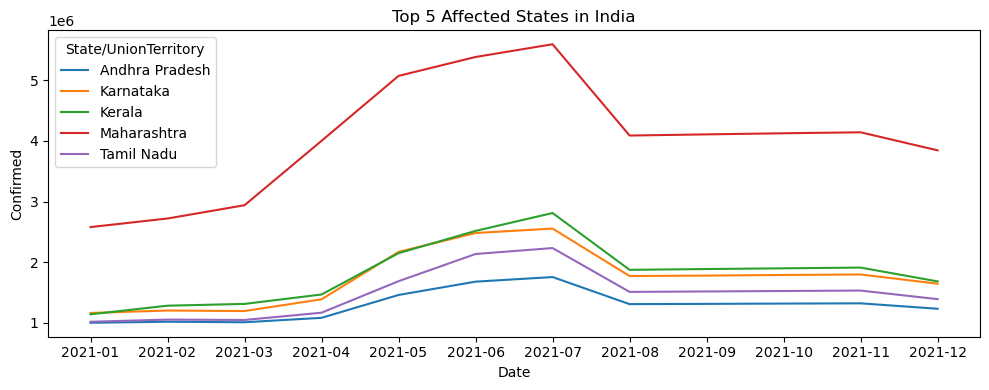

In [39]:
plt.figure(figsize=(10,4))
sns.lineplot(data= year_2021, x = (year_2021['Date']).dt.strftime('%Y-%m') 
             ,y='Confirmed', hue='State/UnionTerritory', ci=None)
plt.title("Top 5 Affected States in India")
plt.tight_layout()
plt.show()

# Sum of Deaths from Maharastra

In [50]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-01-02,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-03-02,Kerala,0,0,3,3


In [40]:
df_covid[df_covid['State/UnionTerritory']=='Maharashtra'] ['Deaths'].sum()

23868185

# Sum of Deaths from Maharastra and Kerala

In [41]:
df_covid[ (df_covid['State/UnionTerritory'].isin(['Maharashtra','Kerala']) )] ['Deaths'].sum()

25756362

# Total Active Cases in 2021 from Kerala

In [42]:
df_covid[(df_covid['Date'].dt.year == 2021)& (df_covid['State/UnionTerritory']=='Kerala')] ['ActiveCases'].sum()

28134303

# Top 10 Most Cured States

In [43]:
top10_cured = df_covid.groupby('State/UnionTerritory').sum() [['Cured']].nlargest(10,'Cured')
top10_cured

,Cured
State/UnionTerritory,
Maharashtra,1024765950
Karnataka,444665851
Kerala,420174235
Tamil Nadu,404095807
Andhra Pradesh,370426530
Uttar Pradesh,291479351
Delhi,273419887
West Bengal,247515102
Chhattisgarh,151609364


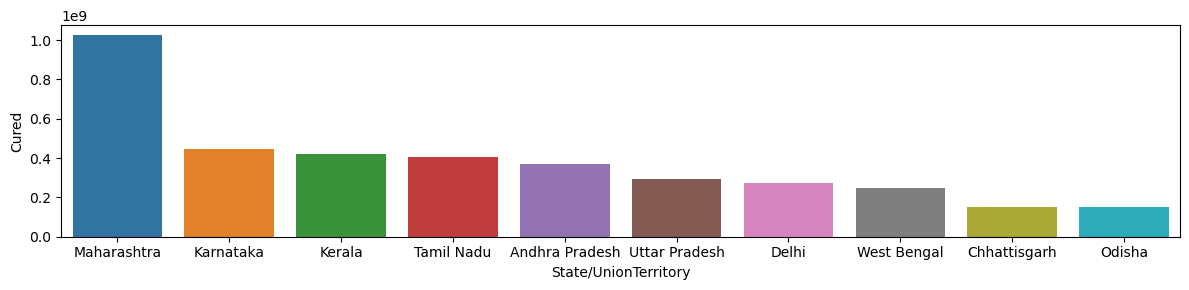

In [44]:
plt.figure(figsize=(12,3))
ax=sns.barplot(x=top10_cured.index, y='Cured',data=top10_cured)
plt.tight_layout()

In [45]:
df_covid.head(2)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1


In [46]:
#########################################################################################################################

# Dataset: covid vaccine

In [46]:
df_vaccine= pd.read_csv("C:\PujaFiles\Excel data for practice\Covid\covid_vaccine_statewise.csv")
df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [47]:
df_vaccine.rename(columns={'Updated On':'Vaccine_Date','Total Individuals Vaccinated':'Total'},inplace=True)

In [48]:
df_vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [49]:
vaccination =df_vaccine.copy()
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [50]:
vaccination.drop(columns=['Sputnik V (Doses Administered)' ,'AEFI','18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)',
                    '60+ Years (Doses Administered)','18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)',
                 '60+ Years(Individuals Vaccinated)'],inplace=True)
print("Deleted")

Deleted


In [51]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,98111.0,153145.0,24.0,251280.0


# Male Vs Female Vaccination

In [52]:
male = vaccination['Male(Individuals Vaccinated)'].sum()
female =  vaccination['Female(Individuals Vaccinated)'].sum()
male,female

(7138698858.0, 6321628736.0)

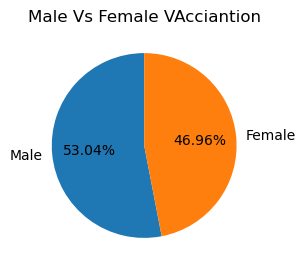

In [53]:
plt.figure(figsize=(4,3))
plt.pie(x=[male,female],labels=['Male','Female'],autopct='%0.2f%%',startangle =90)
## autopct='%0.2f%%': Show data in percentage  with 2 decimal point
plt.title("Male Vs Female VAcciantion")
plt.show()

In [55]:
vaccination = vaccination[~(vaccination['State']=='India')]
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,124.0


In [56]:
vaccination.shape

(7633, 16)

# Top 5 Most Vaccinated State

In [57]:
top5_vaccine=vaccination.groupby('State')['Total'].sum().nlargest(5).to_frame()
top5_vaccine

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


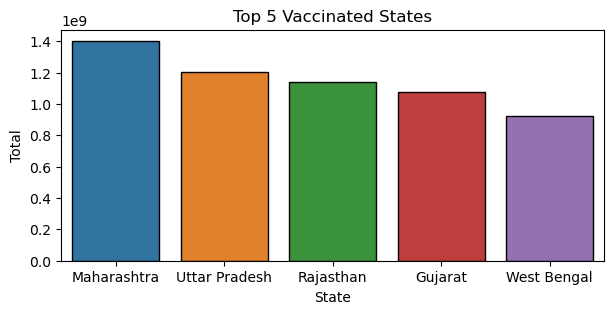

In [95]:
plt.figure(figsize=(7,3))
sns.barplot(x =top5_vaccine.index , y='Total',data=top5_vaccine,ec='black')
plt.title("Top 5 Vaccinated States")
plt.show()